# Videojuegos
* Aintzane Carranza Bargo
* Haizea García Castaños

El siguiente código se usa para añadir el dataset en la base de datos y para descargar las librerías readr y kaggler. (Debido a problemas con un error de la plataforma kaggle hay que **ejecutar este código dos veces** para poder tener el dataset descomprimido).

In [ ]:
install.packages(c("devtools"))
devtools::install_github("ldurazo/kaggler")

library(readr)
library(kaggler)

kgl_auth(username = "aintzanecarranza", key = "6e32a25959ae00815c56b4290ed16878")
response <- kgl_datasets_download_all(owner_dataset = "gregorut/videogamesales")

download.file(response[["url"]], "data/temp.zip", mode = "wb")
unzip_result <- unzip("data/temp.zip", exdir = "data/", overwrite = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'kaggler' from a github remote, the SHA1 (bfb8fb69) has not changed since last install.
  Use `force = TRUE` to force installation

Your Kaggle key has been recorded for this session and saved as `KAGGLE_PAT`
  environment variable for future sessions.



<request>
Options:
* httpauth: 1
* userpwd: aintzanecarranza:6e32a25959ae00815c56b4290ed16878

Código para leer el .csv descargado anteriormente y guardarlo en la variable
*videogames*.

In [ ]:
videogames <- read_csv("data/vgsales.csv")

Rows: 16598 Columns: 11
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Platform, Year, Genre, Publisher
dbl (6): Rank, NA_Sales, EU_Sales, JP_Sales, Other_Sales, Global_Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Código para leer el dataset guardado en la varible *videogames*.

In [ ]:
str(videogames)

spc_tbl_ [16,598 × 11] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Rank        : num [1:16598] 1 2 3 4 5 6 7 8 9 10 ...
 $ Name        : chr [1:16598] "Wii Sports" "Super Mario Bros." "Mario Kart Wii" "Wii Sports Resort" ...
 $ Platform    : chr [1:16598] "Wii" "NES" "Wii" "Wii" ...
 $ Year        : chr [1:16598] "2006" "1985" "2008" "2009" ...
 $ Genre       : chr [1:16598] "Sports" "Platform" "Racing" "Sports" ...
 $ Publisher   : chr [1:16598] "Nintendo" "Nintendo" "Nintendo" "Nintendo" ...
 $ NA_Sales    : num [1:16598] 41.5 29.1 15.8 15.8 11.3 ...
 $ EU_Sales    : num [1:16598] 29.02 3.58 12.88 11.01 8.89 ...
 $ JP_Sales    : num [1:16598] 3.77 6.81 3.79 3.28 10.22 ...
 $ Other_Sales : num [1:16598] 8.46 0.77 3.31 2.96 1 0.58 2.9 2.85 2.26 0.47 ...
 $ Global_Sales: num [1:16598] 82.7 40.2 35.8 33 31.4 ...
 - attr(*, "spec")=
  .. cols(
  ..   Rank = col_double(),
  ..   Name = col_character(),
  ..   Platform = col_character(),
  ..   Year = col_character(),
  ..   Genre = col_char

## Sobre el dataset
Se trata de una lista con videojuegos que han vendido más de 100.000 copias.

**Campos:**
* *Rank:* Clasificación de las ventas totales
* *Name:* Nombre del juego
* *Plataform:* Plataforma de lanzamiento del juego
* *Year:* Año de lanzamiento del juego
* *Genre:* Género del juego
* *Publisher:* Editor del juego
* *NA_Sales:* Número de ventas en Norteamérica (en millones)
* *EU_Sales:* Número de ventas en Europa (en millones)
* *JP_Sales:* Número de ventas en Japón (en millones)
* *Other_Sales:* Número de ventas en el resto del mundo (en millones)
* *Global_Sales:* Número de ventas totales en todo el mundo

Código para descargar las librerias necesarias para ejecutar el proyecto:

In [ ]:
install.packages("dplyr")
install.packages("tidyr")
install.packages("ggplot2")
install.packages("ggwordcloud")
install.packages("plotly")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘markdown’, ‘jpeg’, ‘gridtext’, ‘png’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘crosstalk’




Código para utilizar las librerías necesarias en el proyecto:

In [ ]:
library (dplyr)
library (tidyr)
library(ggplot2)
library(plotly)
library(ggwordcloud)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:stats’:

    filter


The following object is masked from ‘package:graphics’:

    layout




## Pregunta 1
Explorar la relación entre el editor del juego (publisher) y el éxito en diferentes regiones.

***¿Los juegos de ciertos editores tienden a tener más éxito en regiones específicas?***

Lo primero que hacemos es convertir los datos para poder usarlos después. En este caso creamos el factor videogames$Publisher. Hemos decidido usar los datos a partir del 2010 al 2020. Y generamos una tabla con los siguientes datos: Publisher, Global_Sales, NA_Sales, EU_Sales y JP_Sales. Además estos valores pasan por los siguientes procesos:
1.   Se agrupa los datos por publisher
2.   Se usa summarize para que NA_Sales, EU_Sales y JP_Sales pasen a ser las medias de los distintos juegos del publisher. Así que hay una sola fila por publisher.
3.   Se añade un valor en formato texto que expresa cual es el mayor de los average para el publisher. También se añade tanto la media como la varianza para ver cuánto varía la popularidad.


In [ ]:
videogames$Publisher <- factor(videogames$Publisher)

estudio <- videogames %>% filter(Year >= 2010) %>% select(Publisher, NA_Sales, EU_Sales, JP_Sales) %>% group_by(Publisher) %>% summarise(NA_Sales_Avg = mean(NA_Sales), EU_Sales_Avg = mean(EU_Sales), JP_Sales_Avg = mean(JP_Sales)) %>% mutate(MAX = case_when(
      NA_Sales_Avg == pmax(NA_Sales_Avg, EU_Sales_Avg, JP_Sales_Avg) ~ "NA_Sales_Avg",
      EU_Sales_Avg == pmax(NA_Sales_Avg, EU_Sales_Avg, JP_Sales_Avg) ~ "EU_Sales_Avg",
      JP_Sales_Avg == pmax(NA_Sales_Avg, EU_Sales_Avg, JP_Sales_Avg) ~ "JP_Sales_Avg"),
      Media = (NA_Sales_Avg + EU_Sales_Avg + JP_Sales_Avg) / 3,
      Varianza = ((NA_Sales_Avg - Media)^2 + (EU_Sales_Avg - Media)^2 + (JP_Sales_Avg - Media)^2) / 2) %>% arrange(desc(Varianza))
print(estudio)

# A tibble: 277 × 7
   Publisher         NA_Sales_Avg EU_Sales_Avg JP_Sales_Avg MAX   Media Varianza
   <fct>                    <dbl>        <dbl>        <dbl> <chr> <dbl>    <dbl>
 1 Microsoft Game S…        1.39         0.622       0.0214 NA_S… 0.677   0.469 
 2 mixi, Inc                0            0           0.86   JP_S… 0.287   0.247 
 3 Valve Software           0.87         0.415       0.005  NA_S… 0.43    0.187 
 4 Valve                    0.83         0.63        0.02   NA_S… 0.493   0.178 
 5 Hello Games              0.58         0.74        0.02   EU_S… 0.447   0.143 
 6 Eidos Interactive        0.67         0.39        0      NA_S… 0.353   0.113 
 7 Bethesda Softwor…        0.629        0.550       0.0267 NA_S… 0.402   0.107 
 8 NCSoft                   0.515        0.565       0      EU_S… 0.36    0.0978
 9 Take-Two Interac…        0.615        0.362       0.0186 NA_S… 0.332   0.0896
10 LucasArts                0.571        0.339       0      NA_S… 0.303   0.0824
# ℹ 267 

###Tabla EU
Aquí se genera otra tabla en la que se muestra el Publisher, EU_SALES_Avg, NA_Sales_Avg, JP_Sales_Avg y varianza. Todo esto ordenado de más popular a menos. Lo que hace diferente a esta tabla es que todos sus valores tienen un EU_Sales_Avg mayor que NA o JP.

In [ ]:
EU <- estudio %>% filter(MAX == "EU_Sales_Avg") %>% select(Publisher, EU_Sales_Avg, NA_Sales_Avg, JP_Sales_Avg, Varianza) %>% arrange(desc(EU_Sales_Avg))
print(EU)

# A tibble: 73 × 5
   Publisher                     EU_Sales_Avg NA_Sales_Avg JP_Sales_Avg Varianza
   <fct>                                <dbl>        <dbl>        <dbl>    <dbl>
 1 Hello Games                          0.74        0.58        0.02     0.143  
 2 Sony Computer Entertainment …        0.623       0.463       0.138    0.0610 
 3 NCSoft                               0.565       0.515       0        0.0978 
 4 Activision Blizzard                  0.36        0.08        0        0.0357 
 5 Slightly Mad Studios                 0.307       0.0833      0.00667  0.0243 
 6 P2 Games                             0.28        0           0        0.0261 
 7 Mojang                               0.26        0.25        0        0.0217 
 8 Wargaming.net                        0.23        0           0        0.0176 
 9 Codemasters                          0.205       0.0562      0.01     0.0104 
10 Sega                                 0.160       0.118       0.0677   0.00212
# ℹ 63 mo

###Tabla NA
Aquí se genera otra tabla en la que se muestra el Publisher, EU_SALES_Avg, NA_Sales_Avg, JP_Sales_Avg y varianza. Todo esto ordenado de más popular a menos. Lo que hace diferente a esta tabla es que todos sus valores tienen un NA_Sales_Avg mayor que EU o JP.

In [ ]:
NAS <- estudio %>% filter(MAX == "NA_Sales_Avg") %>% select(Publisher, NA_Sales_Avg, EU_Sales_Avg, JP_Sales_Avg, Varianza) %>% arrange(desc(NA_Sales_Avg))
print(NAS)

# A tibble: 105 × 5
   Publisher              NA_Sales_Avg EU_Sales_Avg JP_Sales_Avg Varianza
   <fct>                         <dbl>        <dbl>        <dbl>    <dbl>
 1 Microsoft Game Studios        1.39         0.622     0.0214    0.469  
 2 Valve Software                0.87         0.415     0.005     0.187  
 3 Valve                         0.83         0.63      0.02      0.178  
 4 Eidos Interactive             0.67         0.39      0         0.113  
 5 Nintendo                      0.643        0.459     0.503     0.00921
 6 Bethesda Softworks            0.629        0.550     0.0267    0.107  
 7 Take-Two Interactive          0.615        0.362     0.0186    0.0896 
 8 LucasArts                     0.571        0.339     0         0.0824 
 9 MTV Games                     0.513        0.167     0.000833  0.0684 
10 Electronic Arts               0.473        0.447     0.0116    0.0672 
# ℹ 95 more rows


###Tabla JP
Aquí se genera otra tabla en la que se muestra el Publisher, EU_SALES_Avg, NA_Sales_Avg, JP_Sales_Avg y varianza. Todo esto ordenado de más popular a menos. Lo que hace diferente a esta tabla es que todos sus valores tienen un JP_Sales_Avg mayor que EU o NA.

In [ ]:
JP <- estudio %>% filter(MAX == "JP_Sales_Avg") %>% select(Publisher, JP_Sales_Avg, NA_Sales_Avg, EU_Sales_Avg, Varianza) %>% arrange(desc(JP_Sales_Avg))
print(JP)

# A tibble: 99 × 5
   Publisher       JP_Sales_Avg NA_Sales_Avg EU_Sales_Avg Varianza
   <fct>                  <dbl>        <dbl>        <dbl>    <dbl>
 1 mixi, Inc              0.86       0            0        0.247  
 2 Level 5                0.491      0.00870      0.0117   0.0772 
 3 GungHo                 0.281      0.05         0.00286  0.0222 
 4 Banpresto              0.207      0            0        0.0142 
 5 Capcom                 0.170      0.117        0.0815   0.00197
 6 Ubisoft Annecy         0.16       0.0609       0.0418   0.00403
 7 Nippon Columbia        0.136      0            0        0.00614
 8 Screenlife             0.11       0.0367       0.00167  0.00306
 9 Atlus                  0.107      0.0879       0.0261   0.00179
10 Image Epoch            0.1        0            0        0.00333
# ℹ 89 more rows


###Gráfico de barras
Para poder comparar los datos de las tres regiones se realiza un gráfico de barras para poder ver los datos de manera más clara. En este caso creamos una tabla data que será igual a la primera tabla que aparece en esta pregunta (estudio) salvo que estará ordenada dependiendo de las diferencias entre EU, NA y JP. Debido a ello al recortar para que solo se obtengan los primeros 10 resultados aparecerán los 10 resultados con mayor diferencia.

El gráfico consiste de Publisher en el eje x Avg Sales en el eje *y* y tres tipos de barras que indican el lugar en el que se hicieron las ventas.

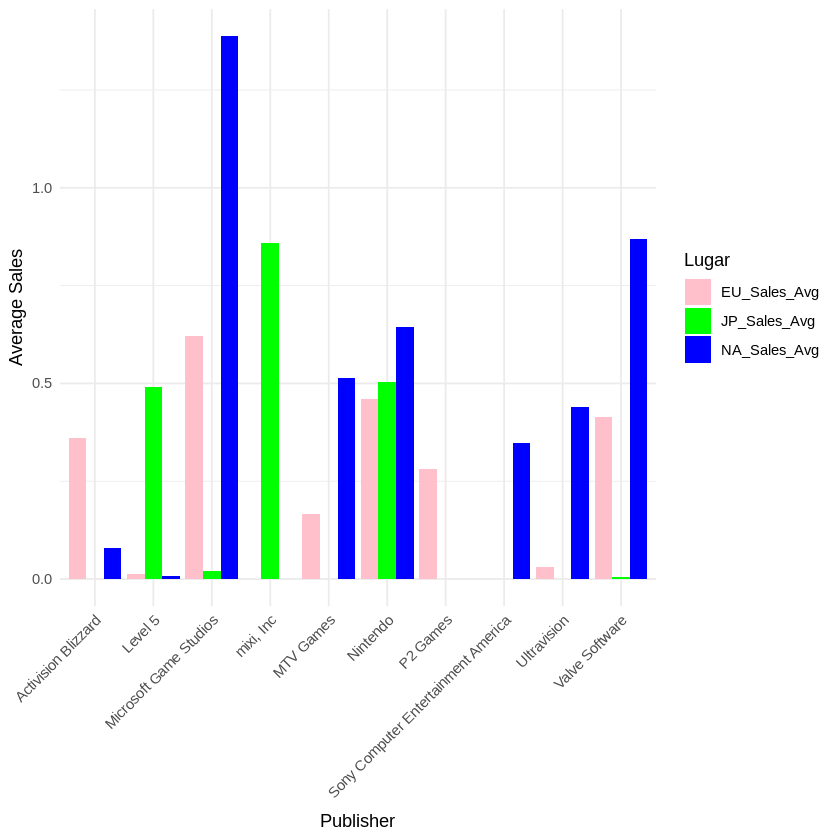

In [ ]:
data <- estudio %>% arrange(desc(abs(abs(EU_Sales_Avg - NA_Sales_Avg)-JP_Sales_Avg)))
data <- data %>% select(Publisher, EU_Sales_Avg,NA_Sales_Avg, JP_Sales_Avg) %>% head(10)
data_long <- data %>% pivot_longer(cols = c("EU_Sales_Avg", "NA_Sales_Avg", "JP_Sales_Avg"), names_to = "Lugar", values_to = "Sales_Avg")
ggplot(data_long, aes(x = Publisher, y = Sales_Avg, fill = Lugar)) + geom_bar(position = "dodge", stat = "identity") + labs(x = "Publisher", y = "Average Sales", fill = "Lugar") + theme_minimal() + scale_fill_manual(values = c("NA_Sales_Avg" = "blue", "JP_Sales_Avg" = "green", "EU_Sales_Avg" = "pink")) + theme(axis.text.x = element_text(angle = 45, hjust = 1))

###Test ANOVA Europa
Para ver si hay relación entre publisher (variable cualitativa) con las ventas (variable cuantitativa). Para ello se hace un análisis de varianza o ANOVA y se muestran los resultados en un gráfico de cajas. Este gráfico contendrá todos los datos que contengan un valor para EU_Sales y estará ordenado de izquierda a derecha de mayores a menores ventas. Este plot es demasiado grande por lo que necesita guardarse para poder ver mejor los resultados.


In [ ]:
videogames_filtered <- videogames %>%
  filter(!is.na(EU_Sales)) %>%
  select(Publisher, EU_Sales)

videogames_filtered <- videogames_filtered %>%
  arrange(desc(EU_Sales))

anova_result <- aov(EU_Sales ~ Publisher, data = videogames_filtered)
summary(anova_result)

plot <- ggplot(videogames_filtered, aes(x = reorder(Publisher, -EU_Sales), y = EU_Sales)) +
  geom_boxplot() +
  labs(title = "Distribución de las Ventas en Europa por Publisher",
       x = "Publisher",
       y = "Ventas en Europa (en millones)") +
  theme_minimal() +
  theme(
    plot.margin = margin(20, 20, 20, 20),
    axis.text.x = element_text(angle = 90, hjust = 1, size = 10),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  ) + ylim(0,13)

ggsave(filename = "ventas_europa.png", plot = plot, bg = "white", width = 50, height = 20, dpi = 300, limitsize = FALSE)
print('Plot guardado en ventas_europa.png')

               Df Sum Sq Mean Sq F value Pr(>F)    
Publisher     578    316  0.5472   2.235 <2e-16 ***
Residuals   16019   3922  0.2449                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


[1] "Plot guardado en ventas_europa.png"


###Test ANOVA América
Para ver si hay relación entre publisher (variable cualitativa) con las ventas (variable cuantitativa). Para ello se hace un análisis de varianza o ANOVA y se muestran los resultados en un gráfico de cajas. Este gráfico contendrá todos los datos que contengan un valor para NA_Sales y estará ordenado de izquierda a derecha de mayores a menores ventas. Este plot es demasiado grande por lo que necesita guardarse para poder ver mejor los resultados.


In [ ]:
videogames_filtered <- videogames %>%
  filter(!is.na(NA_Sales)) %>%
  select(Publisher, NA_Sales)

videogames_filtered <- videogames_filtered %>%
  arrange(desc(NA_Sales))

anova_result <- aov(NA_Sales ~ Publisher, data = videogames_filtered)
summary(anova_result)

plot <- ggplot(videogames_filtered, aes(x = reorder(Publisher, -NA_Sales), y = NA_Sales)) +
  geom_boxplot() +
  labs(title = "Distribución de las Ventas en America por Publisher",
       x = "Publisher",
       y = "Ventas en America (en millones)") +
  theme_minimal() +
  theme(
    plot.margin = margin(20, 20, 20, 20),
    axis.text.x = element_text(angle = 90, hjust = 1, size = 10),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  ) + ylim(0,17)

ggsave(filename = "ventas_america.png", bg = "white", plot = plot, width = 50, height = 20, dpi = 300, limitsize = FALSE)
print('Plot guardado en ventas_america.png')

               Df Sum Sq Mean Sq F value Pr(>F)    
Publisher     578   1094  1.8924   3.039 <2e-16 ***
Residuals   16019   9976  0.6228                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“Removed 4 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


[1] "Plot guardado en ventas_america.png"


###Test ANOVA Japón
Para ver si hay relación entre publisher (variable cualitativa) con las ventas (variable cuantitativa). Para ello se hace un análisis de varianza o ANOVA y se muestran los resultados en un gráfico de cajas. Este gráfico contendrá todos los datos que contengan un valor para JP_Sales y estará ordenado de izquierda a derecha de mayores a menores ventas. Este plot es demasiado grande por lo que necesita guardarse para poder ver mejor los resultados.

In [ ]:
videogames_filtered <- videogames %>%
  filter(!is.na(JP_Sales)) %>%
  select(Publisher, JP_Sales)

videogames_filtered <- videogames_filtered %>%
  arrange(desc(JP_Sales))

anova_result <- aov(JP_Sales ~ Publisher, data = videogames_filtered)
summary(anova_result)

plot <- ggplot(videogames_filtered, aes(x = reorder(Publisher, -JP_Sales), y = JP_Sales)) +
  geom_boxplot() +
  labs(title = "Distribución de las Ventas en Japon por Publisher",
       x = "Publisher",
       y = "Ventas en Japon (en millones)") +
  theme_minimal() +
  theme(
    plot.margin = margin(20, 20, 20, 20),
    axis.text.x = element_text(angle = 90, hjust = 1, size = 10),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  ) + ylim(0,7.5)

ggsave(filename = "ventas_japon.png", bg = "white", plot = plot, width = 50, height = 20, dpi = 300, limitsize = FALSE)
print('Plot guardado en ventas_japon.png')

               Df Sum Sq Mean Sq F value Pr(>F)    
Publisher     578  361.8  0.6259   8.178 <2e-16 ***
Residuals   16019 1225.9  0.0765                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”


[1] "Plot guardado en ventas_japon.png"


## Pregunta 2
Brindar herramientas visuales que resaltan la evolución temporal de las ventas de diferentes plataformas y regiones.

###Europa
Se realiza un filtro a partir del año 2000 hacia delante. En este gráfico solo saldrán los 20 más populares, para que la visualización sea mejor.


Primero se obtienen las columnas Publisher, EU_Sales y Year. Después, se agrupa por Publisher y Año. Después se suma los EU_Sales para que haya una fila por publisher y año. Al final se desagrupa y se ordena de mayor a menor según los EU_Sales. Por último se obtienen los datos de los 20 mejores publisher, es decir aquellos con mayores ventas en Europa. Y se mostrará el gráfico.


El gráfico es un gráfico de líneas que está en el eje y tiene las ventas totales y en el x el año. Por último cada línea representa un publisher y sus ventas durante el transcurso de los años.


`summarise()` has grouped output by 'Publisher'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
  Publisher       Year  EU_Sales
  <fct>           <chr>    <dbl>
1 Nintendo        2006      60.4
2 Nintendo        2005      42.7
3 Nintendo        2009      36.2
4 Nintendo        2007      32.8
5 Electronic Arts 2010      31.2
6 Electronic Arts 2009      31.0


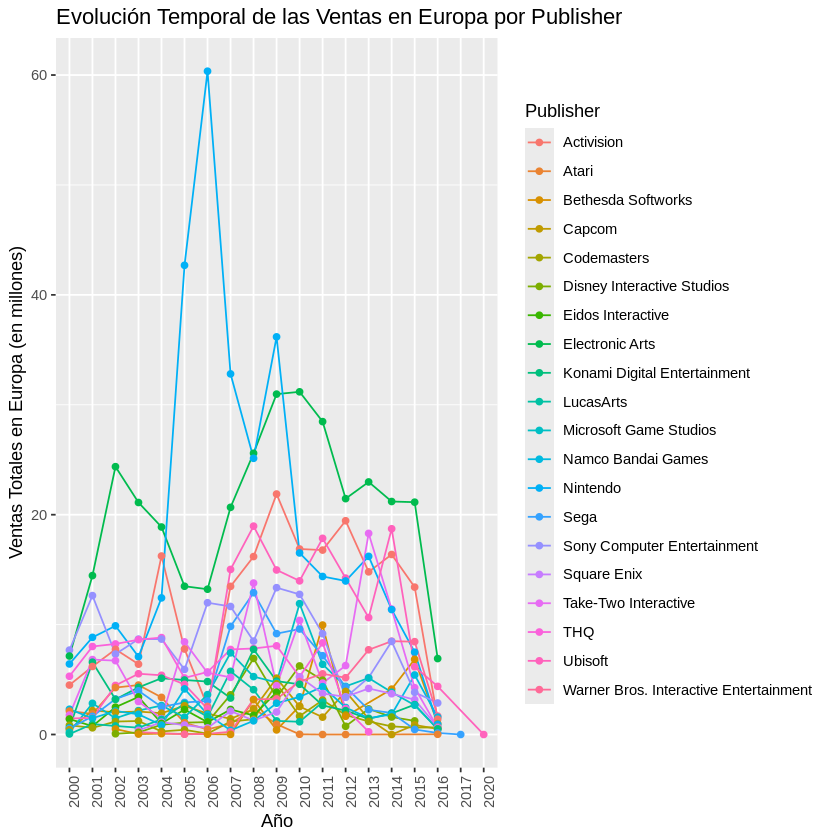

In [ ]:
Europa <- videogames %>%
  filter(Year >= 2000 & Year != 'N/A') %>%
  select(Publisher, EU_Sales, Year) %>%
  group_by(Publisher, Year) %>%
  summarize(EU_Sales = sum(EU_Sales, na.rm = TRUE)) %>%
  ungroup() %>%
  arrange(desc(EU_Sales))

top_publishers <- Europa %>%
  group_by(Publisher) %>%
  summarize(Total_EU_Sales = sum(EU_Sales)) %>%
  arrange(desc(Total_EU_Sales)) %>%
  slice_head(n = 20) %>%
  pull(Publisher)

Europa_top20 <- Europa %>%
  filter(Publisher %in% top_publishers)

print(head(Europa_top20))
plots <- ggplot(Europa_top20, aes(x = Year, y = EU_Sales, color = Publisher, group = Publisher)) +
  geom_line() +
  geom_point() +
  ggtitle( "Evolución Temporal de las Ventas en Europa por Publisher")+
       xlab("Año") +
       ylab("Ventas Totales en Europa (en millones)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plots
ggsave(plot = plots, bg = "white", width = 20, height = 20, dpi = 600, filename = "top20_EU.png")

###AMÉRICA
Se realiza un filtro a partir del año 2000 hacia delante. En este gráfico solo saldrán los 20 más populares, para que la visualización sea mejor.


Primero se obtienen las columnas Publisher, NA_Sales y Year. Después, se agrupa por Publisher y Año. Después se suma los NA_Sales para que haya una fila por publisher y año. Al final se desagrupa y se ordena de mayor a menor según los NA_Sales. Por último se obtienen los datos de los 20 mejores publisher, es decir aquellos con mayores ventas en América. Y se mostrará el gráfico.


El gráfico es un gráfico de líneas que está en el eje y tiene las ventas totales y en el x el año. Por último cada línea representa un publisher y sus ventas durante el transcurso de los años.


`summarise()` has grouped output by 'Publisher'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
  Publisher       Year  NA_Sales
  <fct>           <chr>    <dbl>
1 Nintendo        2006      90.4
2 Nintendo        2009      53.2
3 Electronic Arts 2005      46.8
4 Activision      2009      45.6
5 Electronic Arts 2008      45.1
6 Nintendo        2005      45.0


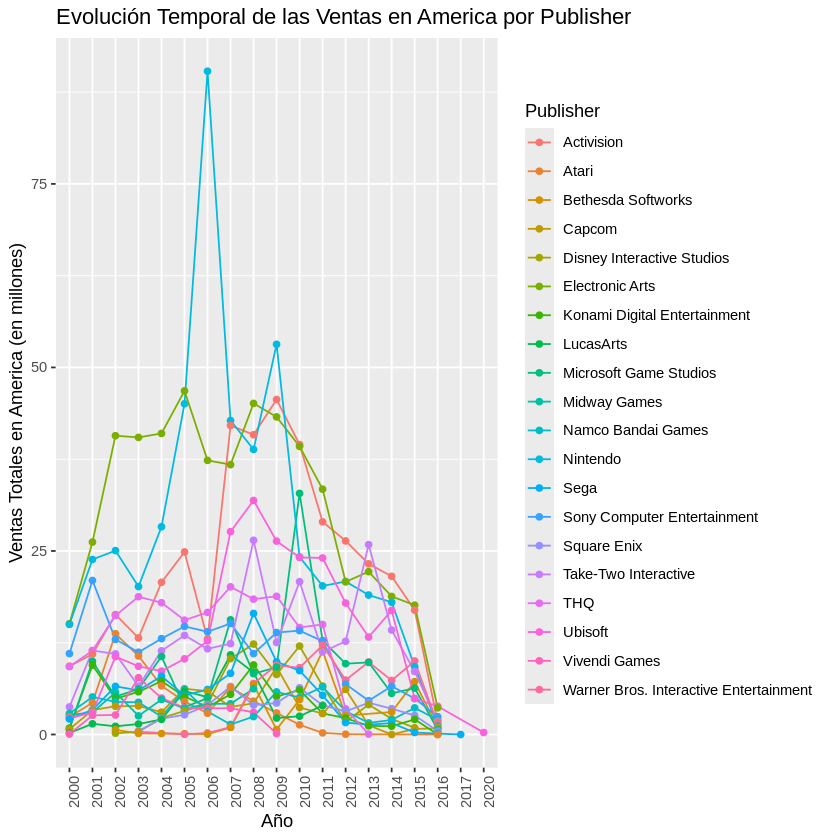

In [ ]:
America <- videogames %>%
  filter(Year >= 2000 & Year != 'N/A') %>%
  select(Publisher, NA_Sales, Year) %>%
  group_by(Publisher, Year) %>%
  summarize(NA_Sales = sum(NA_Sales, na.rm = TRUE)) %>%
  ungroup() %>%
  arrange(desc(NA_Sales))

top_publishers <- America %>%
  group_by(Publisher) %>%
  summarize(Total_NA_Sales = sum(NA_Sales)) %>%
  arrange(desc(Total_NA_Sales)) %>%
  slice_head(n = 20) %>%
  pull(Publisher)

America_top20 <- America %>%
  filter(Publisher %in% top_publishers)

print(head(America_top20))
plots <- ggplot(America_top20, aes(x = Year, y = NA_Sales, color = Publisher, group = Publisher)) +
  geom_line() +
  geom_point() +
  ggtitle( "Evolución Temporal de las Ventas en America por Publisher")+
       xlab("Año") +
       ylab("Ventas Totales en America (en millones)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

plots
ggsave(plot = plots, bg = "white", width = 20, height = 20, dpi = 600, filename = "top20_NA.png")

###JAPÓN
Se realiza un filtro a partir del año 2000 hacia delante. En este gráfico solo saldrán los 20 más populares, para que la visualización sea mejor.


Primero se obtienen las columnas Publisher, JP_Sales y Year. Después, se agrupa por Publisher y Año. Después se suma los JP_Sales para que haya una fila por publisher y año. Al final se desagrupa y se ordena de mayor a menor según los JP_Sales. Por último se obtienen los datos de los 20 mejores publisher, es decir aquellos con mayores ventas en Japón. Y se mostrará el gráfico.


El gráfico es un gráfico de líneas que está en el eje y tiene las ventas totales y en el x el año. Por último cada línea representa un publisher y sus ventas durante el transcurso de los años.


`summarise()` has grouped output by 'Publisher'. You can override using the
`.groups` argument.


# A tibble: 6 × 3
  Publisher Year  JP_Sales
  <fct>     <chr>    <dbl>
1 Nintendo  2006      36.7
2 Nintendo  2009      29.8
3 Nintendo  2005      29.5
4 Nintendo  2007      20.0
5 Nintendo  2008      20.0
6 Nintendo  2012      18.6


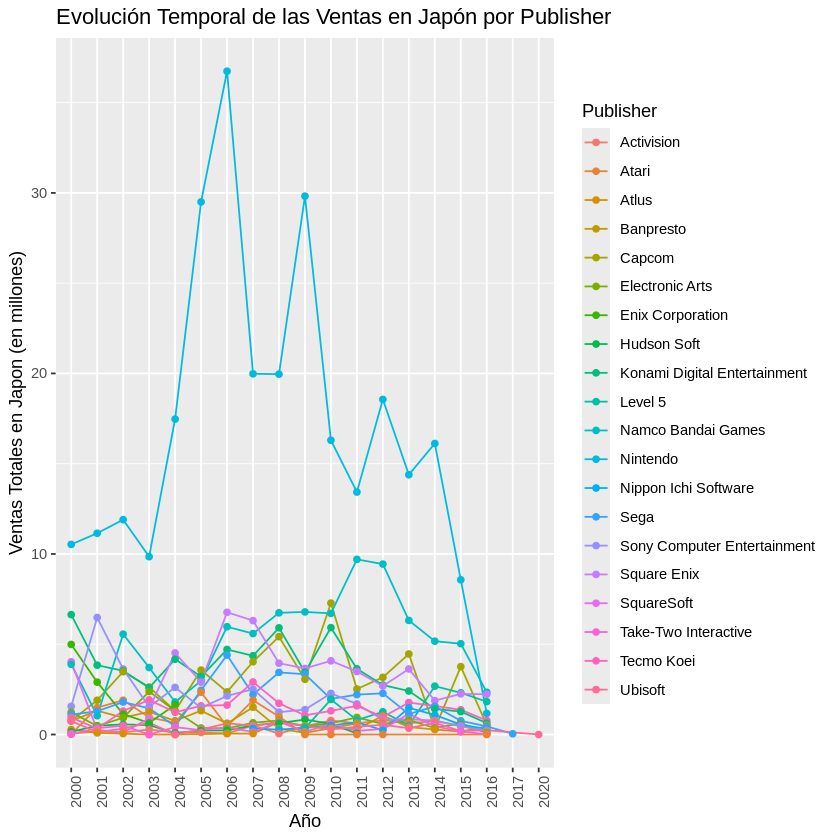

In [ ]:
Japon <- videogames %>%
  filter(Year >= 2000 & Year != 'N/A') %>%
  select(Publisher, JP_Sales, Year) %>%
  group_by(Publisher, Year) %>%
  summarize(JP_Sales = sum(JP_Sales, na.rm = TRUE)) %>%
  ungroup() %>%
  arrange(desc(JP_Sales))

top_publishers <-  Japon %>%
  group_by(Publisher) %>%
  summarize(Total_JP_Sales = sum(JP_Sales)) %>%
  arrange(desc(Total_JP_Sales)) %>%
  slice_head(n = 20) %>%
  pull(Publisher)

Japon_top20 <- Japon %>%
  filter(Publisher %in% top_publishers)

print(head(Japon_top20))
plots <- ggplot(Japon_top20, aes(x = Year, y = JP_Sales, color = Publisher, group = Publisher)) +
  geom_line() +
  geom_point() +
  ggtitle( "Evolución Temporal de las Ventas en Japón por Publisher")+
       xlab("Año") +
       ylab("Ventas Totales en Japon (en millones)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

plots
ggsave(plot = plots, bg = "white", width = 20, height = 20, dpi = 600, filename = "top20_JP.png")

## Pregunta 3
Realizar un análisis temporal para identificar si hay algún periodo en que se lancen más videojuegos exitosos.

***¿Existen años más exitosos en términos de ventas por juego lanzado?***

###Análisis de relación entre año y ventas mundiales
Para poder ver si hay una relación calculamos el coeficiente de correlación y mostramos los resultados de forma más visual a partir de un diagrama de dispersión con línea de tendencia. En este caso los datos a relacionar serían el año y las ventas por juego lanzado. Para eso hemos decidido usar la variable Global_Sales que recoge las ventas mundiales. Además para evitar datos que pueden entorpecer el análisis primero filtramos para no obtener esos datos. También cambiamos el tipo de datos de Año debido a que el dataset lo registra como string.


[1] "Correlación entre el año y las ventas globales: -0.0747347976156864"


`geom_smooth()` using formula = 'y ~ x'


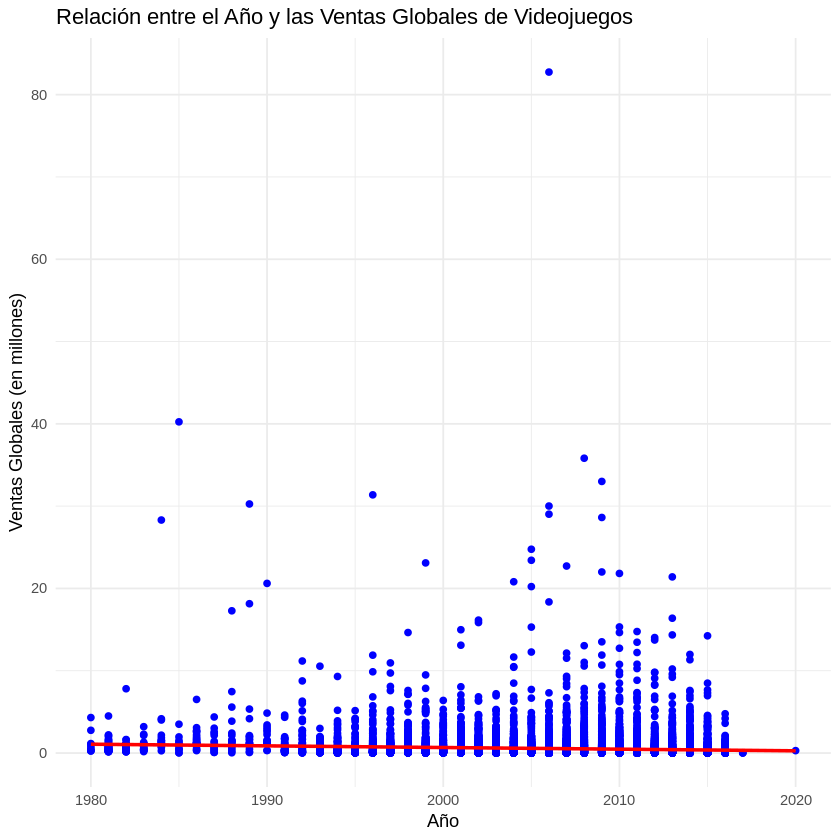

In [ ]:
datos <- videogames %>% filter(Year != "N/A") %>% select(Year,Global_Sales)
datos$Year <- as.numeric(datos$Year)
correlacion <- cor(datos$Year, datos$Global_Sales, use = "complete.obs")
print(paste("Correlación entre el año y las ventas globales:", correlacion))
ggplot(datos, aes(x = Year, y = Global_Sales)) +
  geom_point(color = "blue") +
  geom_smooth(method = "lm", color = "red") +
  labs(title = "Relación entre el Año y las Ventas Globales de Videojuegos",
       x = "Año",
       y = "Ventas Globales (en millones)") +
  theme_minimal()

###Otras medidas
Además de poder ver si un año ha sido más exitoso debido a sus ventas. Sabemos que los valores del dataset están ordenados de forma que su id establece un ranking.


Así hemos concluido que se puede ver la popularidad de un año haciendo una suma de los rangos. Es decir, si en 2001 tengo un juego en la posición 5 y otro en la posición 10, la popularidad sería 15. Cuanto menor sea la cifra más exitoso será el año.

Debido a que esto sigue siendo parcial ya que no es lo mismo un año con dos juegos que uno con 200 decidimos que rango será esta suma dividida por la cantidad de videojuegos de ese año.


En este trozo de código podemos ver el éxito ordenado de más éxito a menos.


In [ ]:
resultado <- videogames %>% filter(Year != "N/A") %>% select(Year,Rank)
resultado <- resultado %>% group_by(Year) %>%   summarise(Exito = sum(Rank, na.rm = TRUE) / n())
resultado

Year,Exito
<chr>,<dbl>
1980,3314.000
1981,4141.043
1982,4144.056
1983,3338.765
1984,1636.500
1985,3964.643
1986,1713.619
1987,3418.812
1988,2478.733


###Visualización del Éxito
Para poder verlo mejor hemos creado un histograma en el que y es la cantidad de la variable éxito y x los diferentes años. Además, hay que tener en cuenta que **cuanto mayor sea el valor de éxito menos popularidad tendrá**.




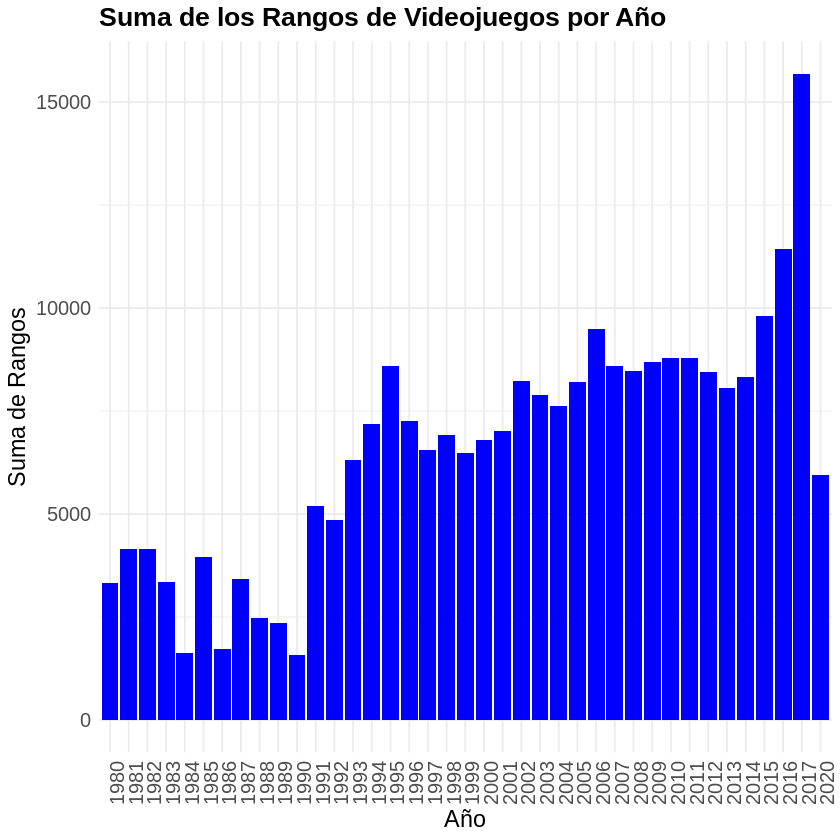

In [ ]:
ggplot(resultado, aes(x = Year, y = Exito)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Suma de los Rangos de Videojuegos por Año",
       x = "Año",
       y = "Suma de Rangos") +
  theme_minimal() + theme(
    plot.margin = margin(5, 5, 5, 5),
    axis.text.x = element_text(angle = 90, hjust = 1, size = 12),
    axis.text.y = element_text(size = 12),
    axis.title.x = element_text(size = 14),
    axis.title.y = element_text(size = 14),
    plot.title = element_text(size = 16, face = "bold")
  )

## Pregunta 4
Haga un análisis de las palabras más comunes en los títulos de juegos (sin contar stopwords o números) para cada uno de los géneros.

###Obtener las 10 palabras más comunes en los títulos
En este apartado visualizamos las palabras más comunes en los títulos de los juegos en formato de tabla. Por eso solo obtenemos los 10 primeros. La tabla consiste de la columna género y nombre. En el caso del nombre lo transformamos para que no cuente espacios ni números. Por último se transforma la columna nombres para que tenga una lista, cada objeto de la lista será el nombre {cantidad}.

In [ ]:
# Cargar la lista de stopwords en inglés (esta lista a sido obtenida por Microsoft Copilot)
stopwords <- c("i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves",
               "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their",
               "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are",
               "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a",
               "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for",
               "with", "about", "against", "between", "into", "through", "during", "before", "after", "above",
               "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further",
               "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
               "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same",
               "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now")

separate_words <- function(data) {
  data %>%
    select(Name, Genre) %>%
    mutate(Name = tolower(Name)) %>%
    mutate(Name = gsub("[[:punct:]]", "", Name)) %>%
    mutate(Name = gsub("[0-9]", "", Name)) %>%
    mutate(Name = strsplit(Name, " ")) %>%
    unnest(Name) %>%
    filter(!Name %in% stopwords & Name != " " & Name != "") %>%
    group_by(Name, Genre) %>%
    summarise(Cuenta = n()) %>%
    arrange(desc(Cuenta))
}

NombresVideojuegos <- separate_words(videogames)

wordcloud_data <- NombresVideojuegos

NombresVideojuegos <- NombresVideojuegos %>%
  group_by(Genre) %>%
  summarise(Nombres = list(head(paste(Name, " {", Cuenta, "} ", sep = ""), 10)))

NombresVideojuegos <- NombresVideojuegos %>%
  mutate(Nombres = sapply(Nombres, function(x) paste(x, collapse = ", ")))

NombresVideojuegos


`summarise()` has grouped output by 'Name'. You can override using the
`.groups` argument.


Genre,Nombres
<chr>,<chr>
Action,"lego {143} , warriors {124} , game {102} , wars {92} , star {83} , evil {67} , ii {66} , battle {63} , harry {62} , potter {62}"
Adventure,"portable {48} , ni {34} , game {29} , adventure {27} , ds {21} , mystery {19} , de {18} , lost {17} , love {17} , world {17}"
Fighting,"vs {72} , dragon {56} , fighter {51} , ball {50} , wwe {48} , battle {47} , fighters {47} , ninja {44} , king {42} , naruto {42}"
Misc,"party {107} , game {94} , ds {86} , dance {84} , rock {76} , band {64} , collection {60} , hero {60} , vol {56} , world {53}"
Platform,"super {43} , disneys {41} , sonic {38} , man {35} , mario {33} , mega {32} , kong {29} , donkey {26} , rayman {26} , adventure {24}"
Puzzle,"puyo {39} , puzzle {39} , tetris {27} , super {25} , bomberman {23} , quest {20} , challenge {19} , jewel {19} , bustamove {15} , brain {14}"
Racing,"racing {143} , speed {89} , need {78} , rally {55} , nascar {51} , championship {48} , racer {47} , world {44} , f {43} , race {42}"
Role-Playing,"dragon {84} , fantasy {80} , final {78} , ii {78} , star {45} , dungeon {43} , quest {43} , heroes {42} , tales {41} , iii {38}"
Shooter,"call {70} , duty {61} , ii {48} , clancys {47} , tom {47} , star {40} , wars {39} , dead {37} , war {32} , warfare {29}"


###Wordcloud
En este apartado creamos una función para que cree gráficos de palabras con la variable wordcloud_data y un género. wordcloud_data sólo guarda una lista de palabras y fue obtenida en el código anterior. No contiene números ni stopwords.


La función se encarga de filtrar por el género especificado, ordenarlo de más popular a menor y para mejor visualización muestra solo los primeros 100 resultados.


In [ ]:
create_wordcloud <- function(data, genre) {
  genre_data <- data %>% filter(Genre == genre)
  top_words <- genre_data %>% arrange(desc(Cuenta)) %>% head(100)

  ggplot(top_words, aes(label = Name, size = Cuenta, color = Cuenta)) +
    geom_text_wordcloud_area() +
    scale_size_area(max_size = 20) +
    labs(title = paste("Word Cloud for Genre:", genre))
  }

###Wordcloud: Sports
Muestra las 100 palabras más utilizadas por el género sports.

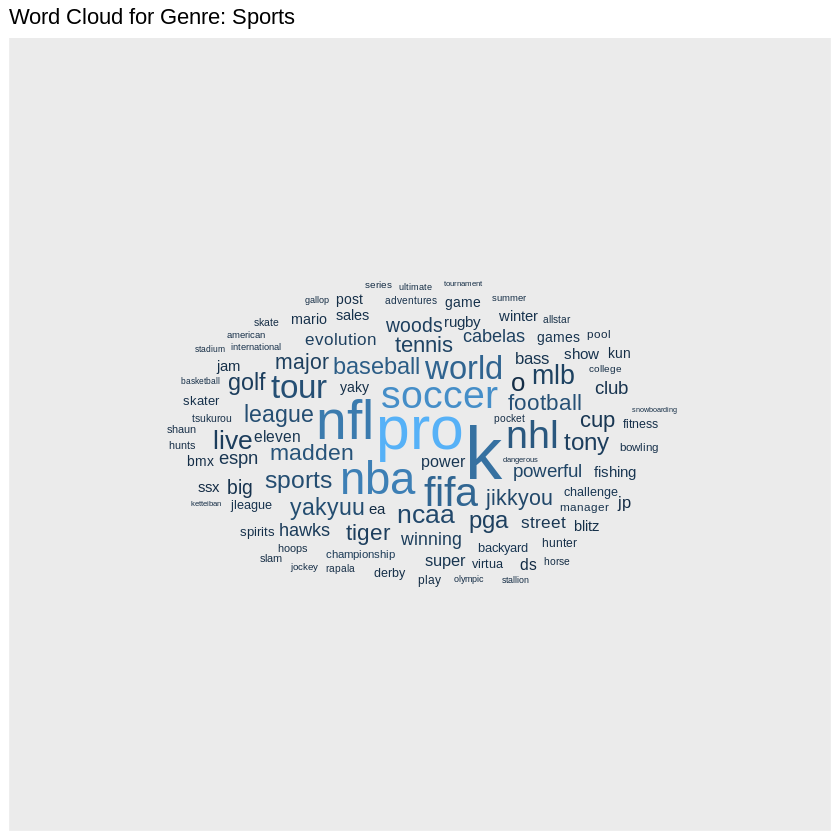

In [ ]:
create_wordcloud(wordcloud_data, "Sports")

###Wordcloud: Racing
Muestra las 100 palabras más utilizadas por el género racing.

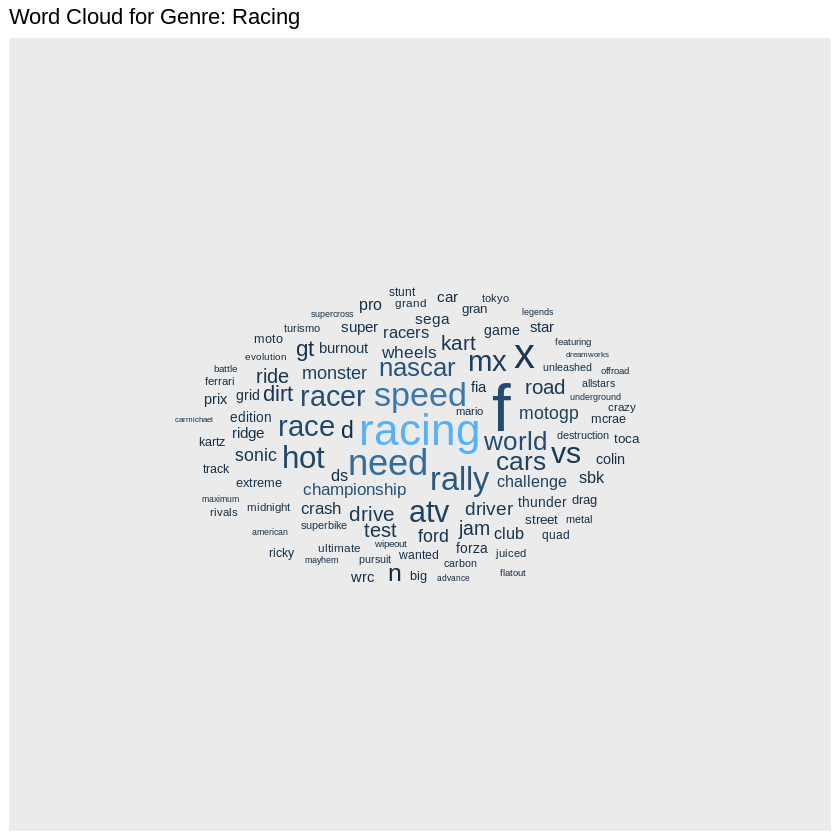

In [ ]:
create_wordcloud(wordcloud_data, "Racing")

###Wordcloud: Misc
Muestra las 100 palabras más utilizadas por el género misc.

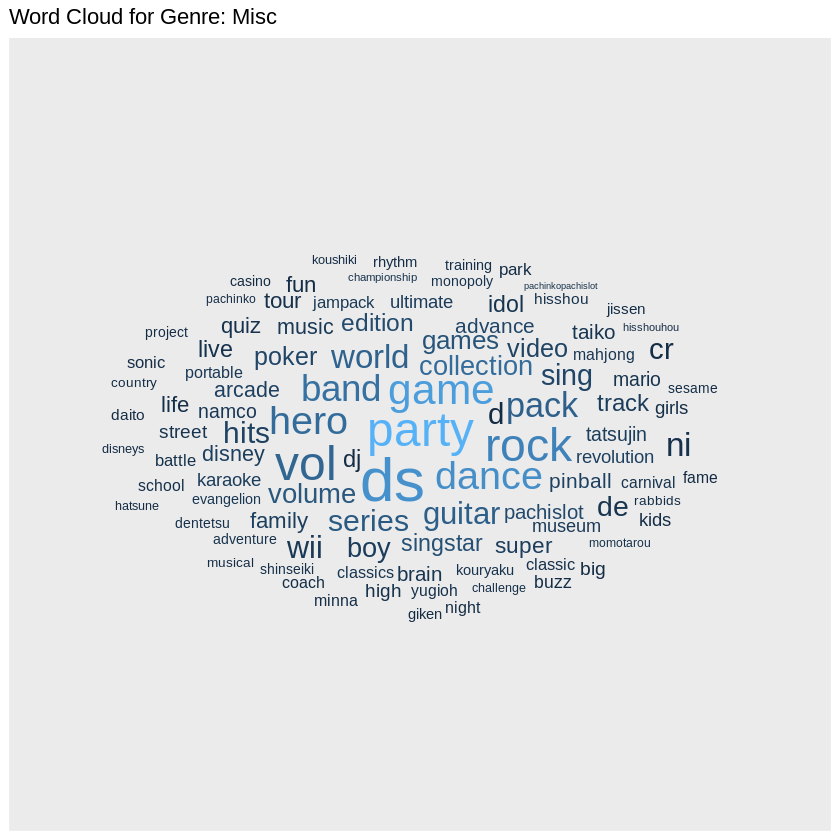

In [ ]:
create_wordcloud(wordcloud_data, "Misc")

###Wordcloud: Simulation
Muestra las 100 palabras más utilizadas por el género simulation.

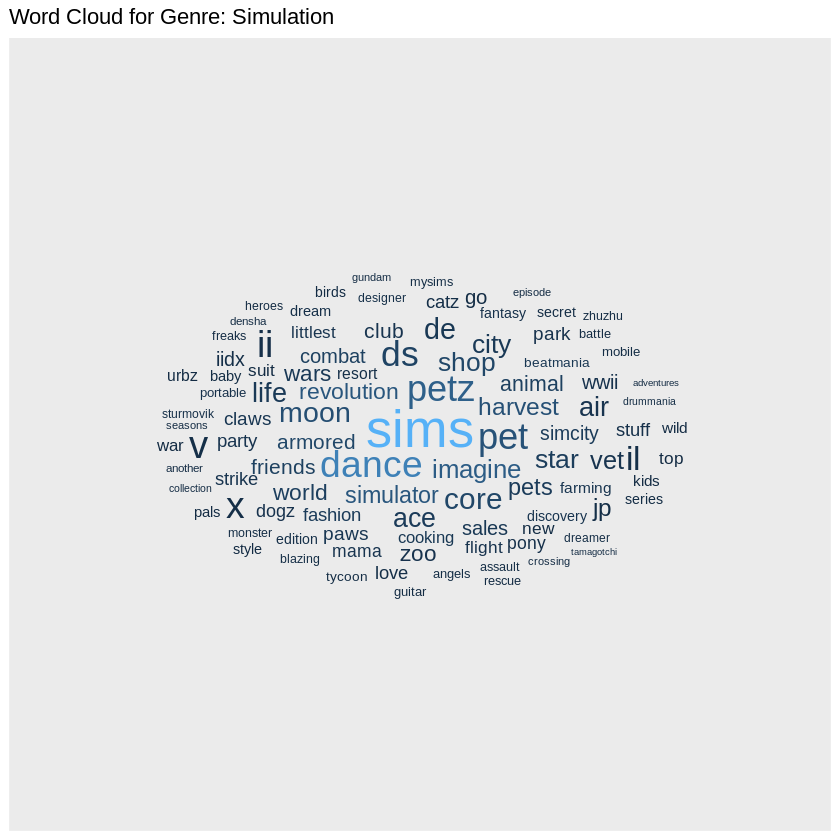

In [ ]:
create_wordcloud(wordcloud_data, "Simulation")

###Wordcloud: Fighting
Muestra las 100 palabras más utilizadas por el género fighting.

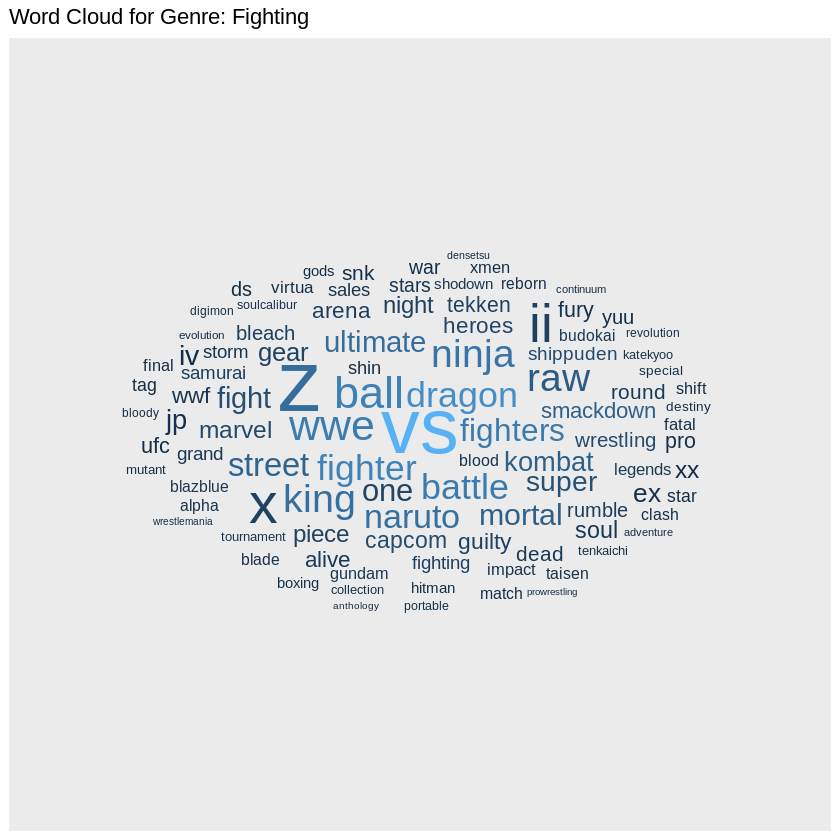

In [ ]:
create_wordcloud(wordcloud_data, "Fighting")

###Wordcloud: Action
Muestra las 100 palabras más utilizadas por el género action.

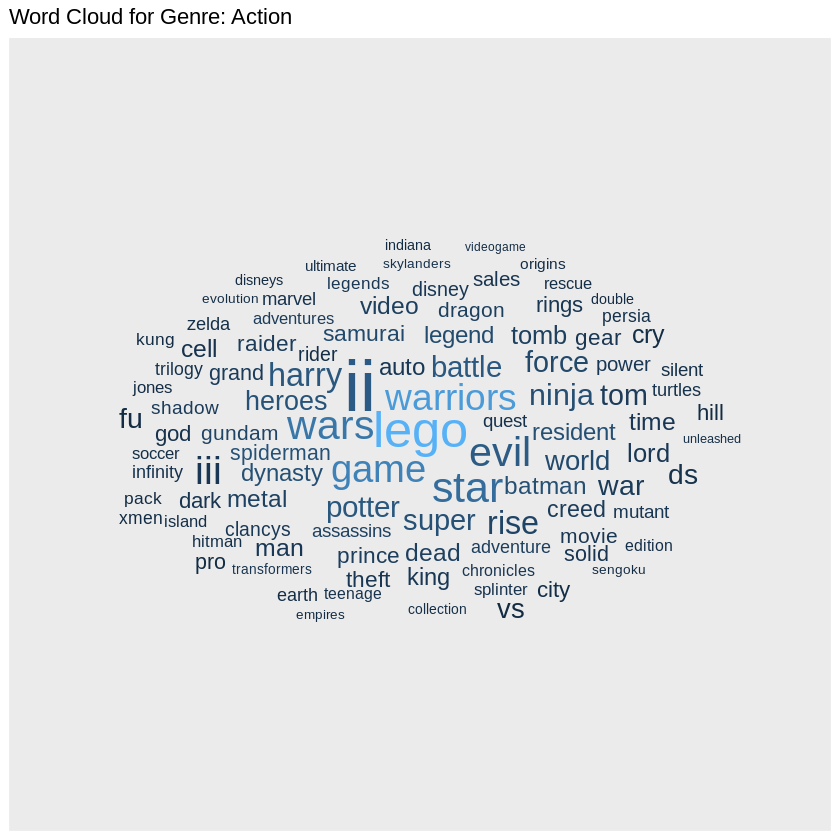

In [ ]:
create_wordcloud(wordcloud_data, "Action")

###Wordcloud: Role-Playing
Muestra las 100 palabras más utilizadas por el género role-playing.

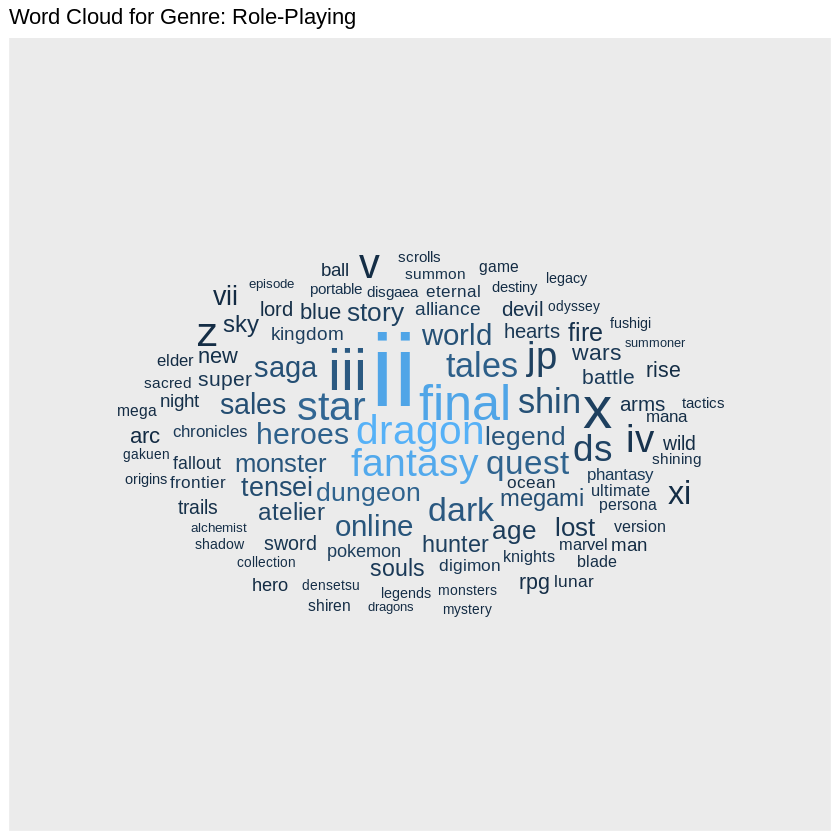

In [ ]:
create_wordcloud(wordcloud_data, "Role-Playing")

###Wordcloud: Shooter
Muestra las 100 palabras más utilizadas por el género shooter.

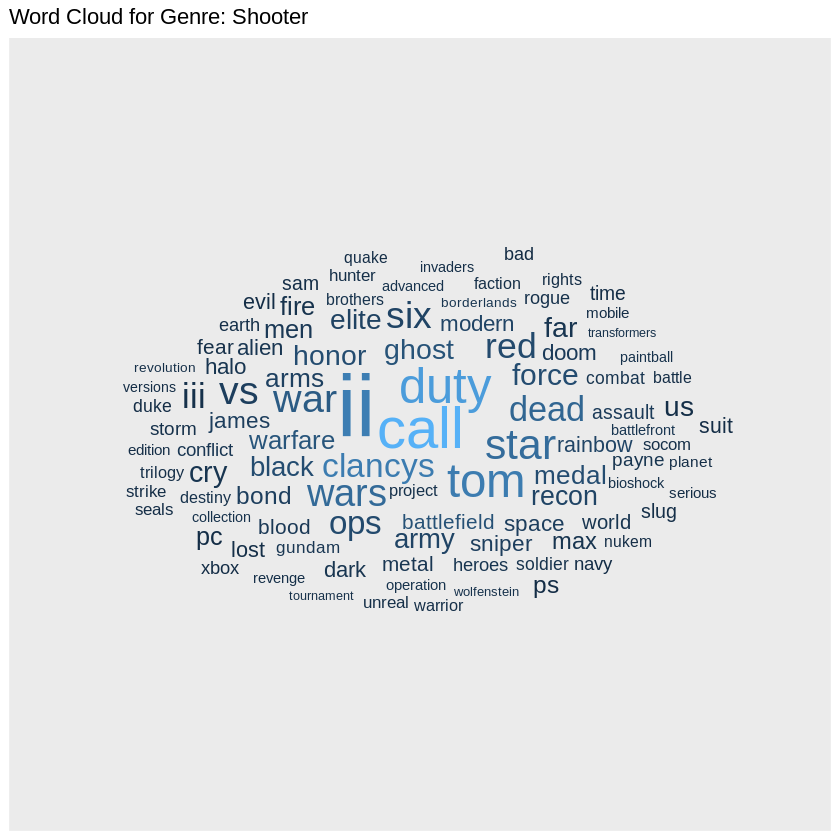

In [ ]:
create_wordcloud(wordcloud_data, "Shooter")

###Wordcloud: Strategy
Muestra las 100 palabras más utilizadas por el género strategy.

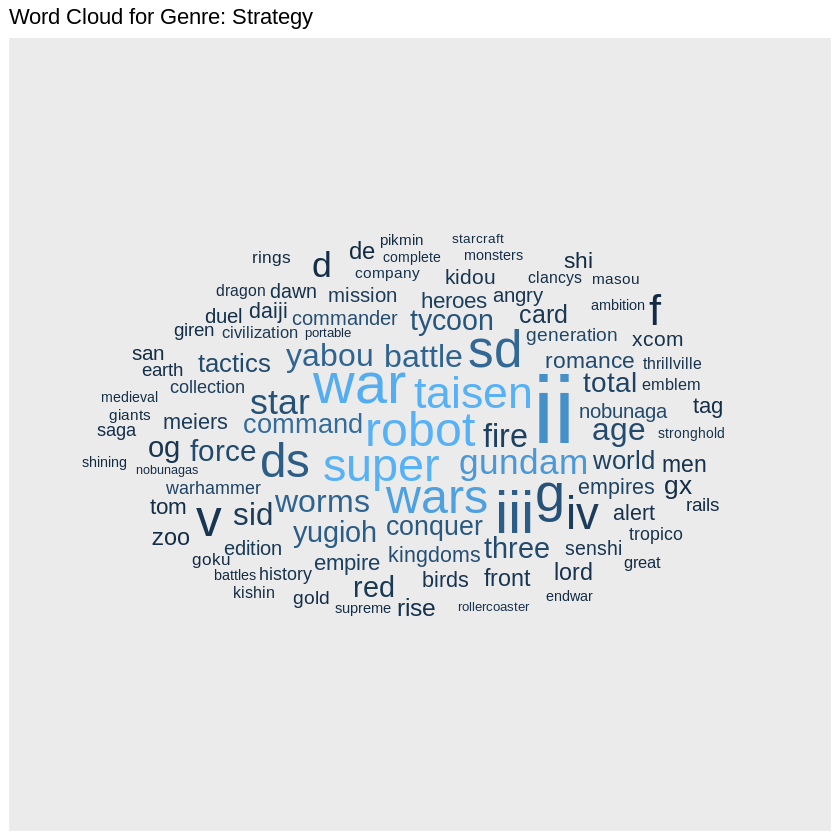

In [ ]:
create_wordcloud(wordcloud_data, "Strategy")

###Wordcloud: Platform
Muestra las 100 palabras más utilizadas por el género platform.

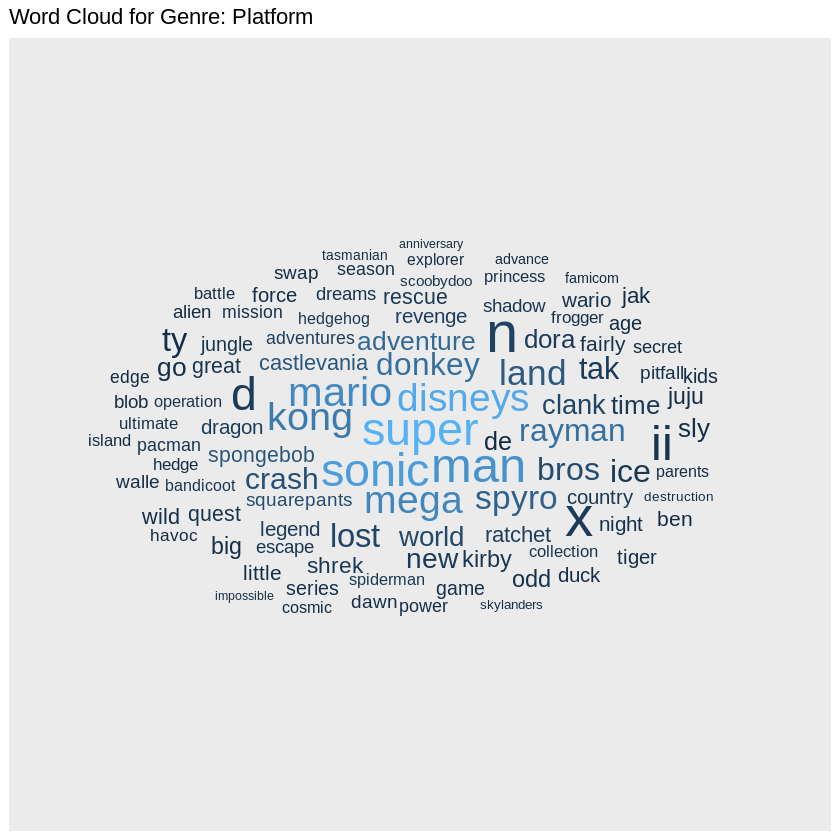

In [ ]:
create_wordcloud(wordcloud_data, "Platform")

###Wordcloud: Adventure
Muestra las 100 palabras más utilizadas por el género adventure.

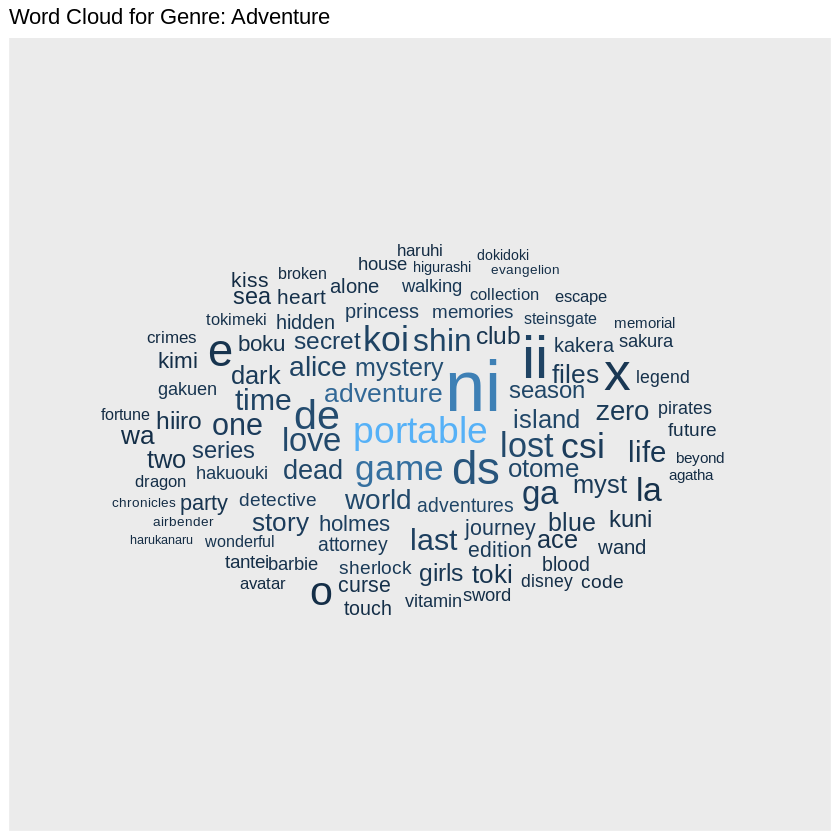

In [ ]:
create_wordcloud(wordcloud_data, "Adventure")

###Wordcloud: Puzzle
Muestra las 100 palabras más utilizadas por el género puzzle.

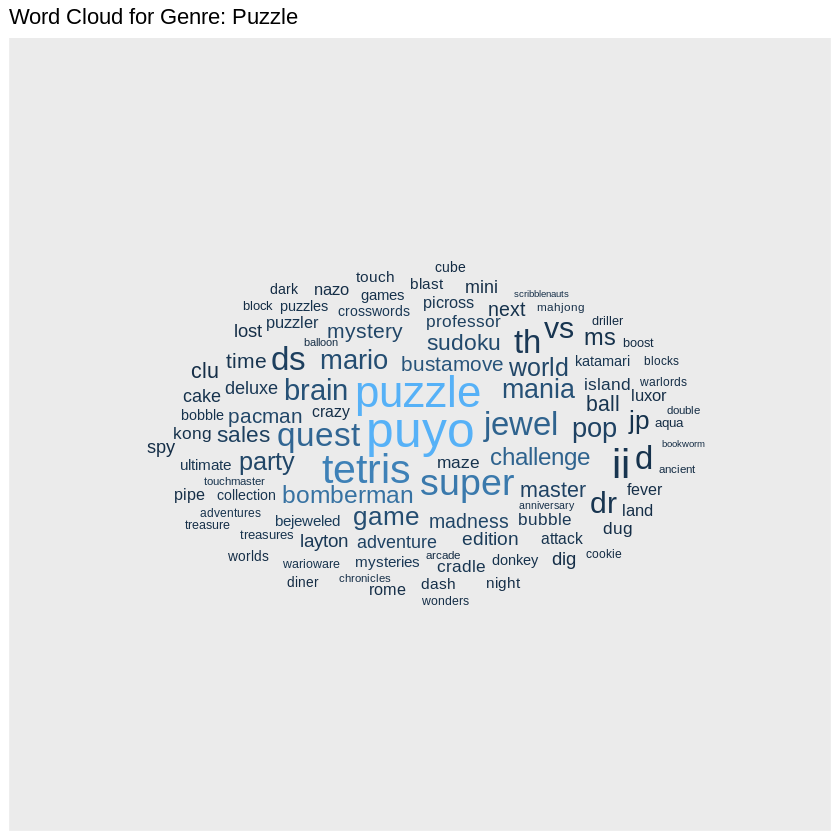

In [ ]:
create_wordcloud(wordcloud_data, "Puzzle")

## Pregunta 5
Haga un análisis de los juegos que son lanzados en diferentes plataformas en diferentes años.


###Preparar los datos
Primero lo que haremos es contar por plataforma y año cuántos videojuegos han salido. Los datos están ordenados por la cantidad de videojuegos de mayor a menor. Los cuales se guardaran en la variable resultado y se muestra al ejecutar el código. No se incluirán aquellos datos en los que el año es 'N/A'.


In [ ]:
Videojuegos <- videogames %>% filter(Year != 'N/A')
resultado <- Videojuegos %>% group_by(Platform, Year) %>% summarise(Cantidad = n()) %>% arrange(desc(Cantidad))
resultado

`summarise()` has grouped output by 'Platform'. You can override using the
`.groups` argument.


Platform,Year,Cantidad
<chr>,<chr>,<int>
DS,2008,492
DS,2009,405
DS,2007,377
DS,2010,326
Wii,2009,325
Wii,2008,282
PS2,2002,280
PS2,2005,260
PS2,2004,259


###Gráfico de líneas
Con los datos obtenidos en el apartado anterior se genera un gráfico de líneas. Es un gráfico para ver la cantidad de lanzamientos que hay en la diferentes plataforma a lo largo de los años.


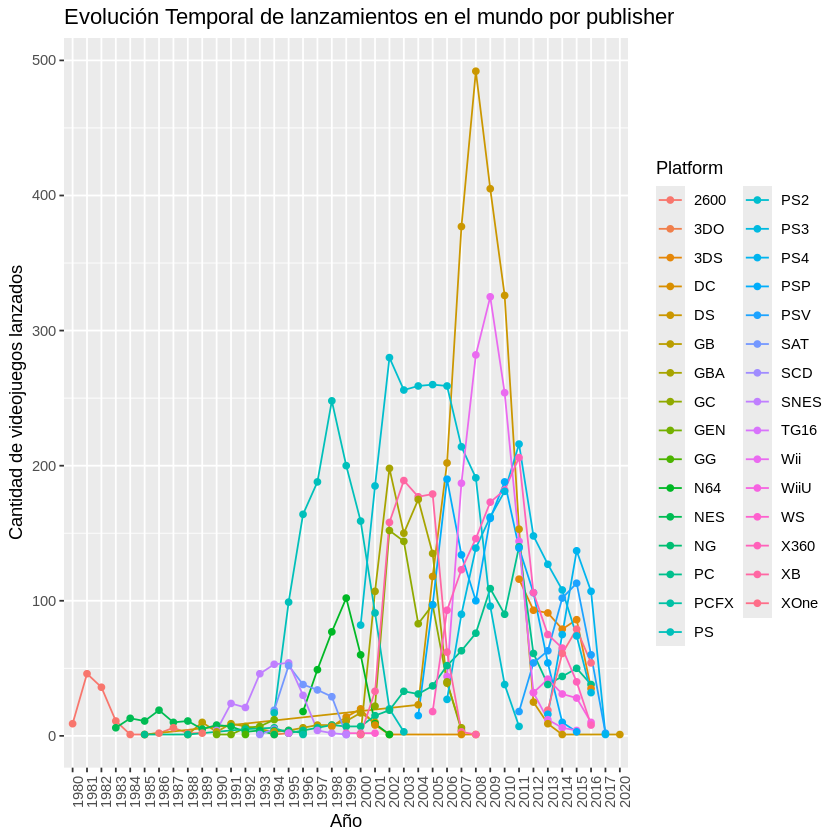

In [ ]:
resultado$Año <- as.factor(resultado$Year)
plots <- ggplot(resultado, aes(x = Year, y = Cantidad, color = Platform, group = Platform)) +
  geom_line() +
  geom_point() +
  ggtitle( "Evolución Temporal de lanzamientos en el mundo por publisher")+
       xlab("Año") +
       ylab("Cantidad de videojuegos lanzados") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
plots
ggsave(plot = plots, width = 20, height = 20, dpi = 600, filename = "figure5.png")

###Análisis por año concreto
Ya que en la anterior gráfica no se veían demasiado bien los datos, hemos decidido realizar dos diferentes gráficas en la cuales se puede ver la cantidad de lanzamientos por plataforma durante un año especifico.


En este caso se ha realizado entre el año 2008 y el año 2013. Esos años han sido elegidos ya que en esos años se puede ver que hubo bastantes videojuegos. En el caso de 2013 podemos ver una gran concentración de puntos que representan videojuegos. En cambio 2008 es interesante por la gran recaudación conseguida.


Ambos gráficos son gráficos de barras estructurados de manera similar. El eje y es el número de lanzamientos y el x la plataforma.


Aquí aparece el gráfico referente a 2008.


# A tibble: 9 × 2
  Platform NumeroLanzamientos
  <chr>                 <int>
1 DC                        1
2 DS                      492
3 PC                       76
4 PS2                     191
5 PS3                     139
6 PSP                     100
7 Wii                     282
8 X360                    146
9 XB                        1


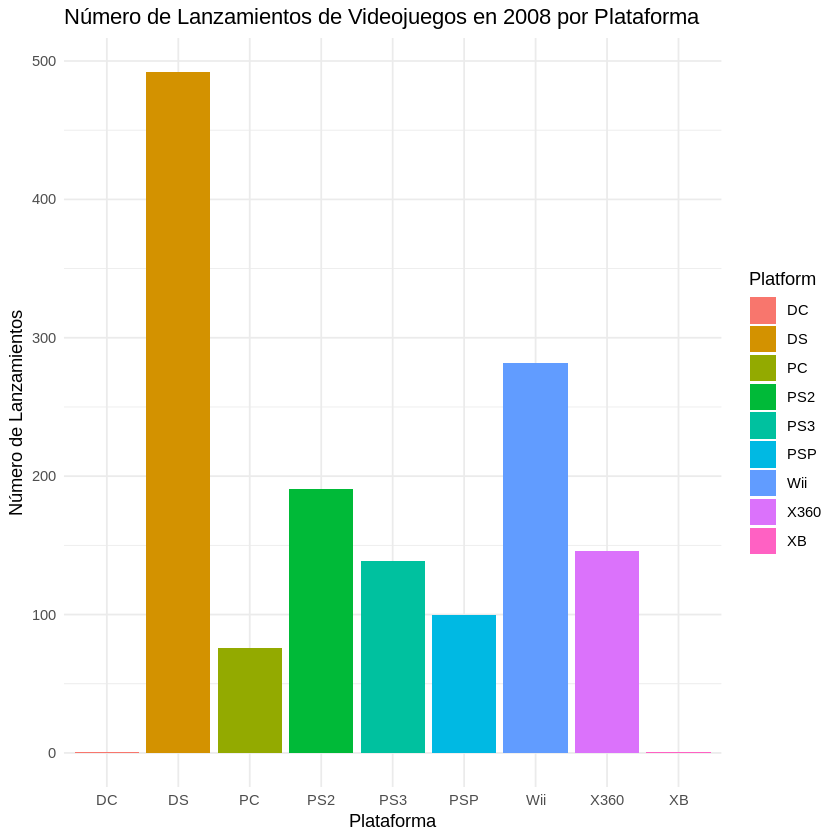

In [ ]:
#2008
lanzamientos_2008 <- Videojuegos %>% filter(Year == 2008)
lanzamientos_por_plataforma <- lanzamientos_2008 %>%
group_by(Platform) %>%
summarise(NumeroLanzamientos = n())
print(lanzamientos_por_plataforma)
ggplot(lanzamientos_por_plataforma, aes(x = Platform, y = NumeroLanzamientos, fill = Platform)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Número de Lanzamientos de Videojuegos en 2008 por Plataforma",
       x = "Plataforma", y = "Número de Lanzamientos")

Y aquí el de 2013.

# A tibble: 11 × 2
   Platform NumeroLanzamientos
   <chr>                 <int>
 1 3DS                      91
 2 DS                        9
 3 PC                       38
 4 PS3                     127
 5 PS4                      16
 6 PSP                      54
 7 PSV                      63
 8 Wii                      12
 9 WiiU                     42
10 X360                     75
11 XOne                     19


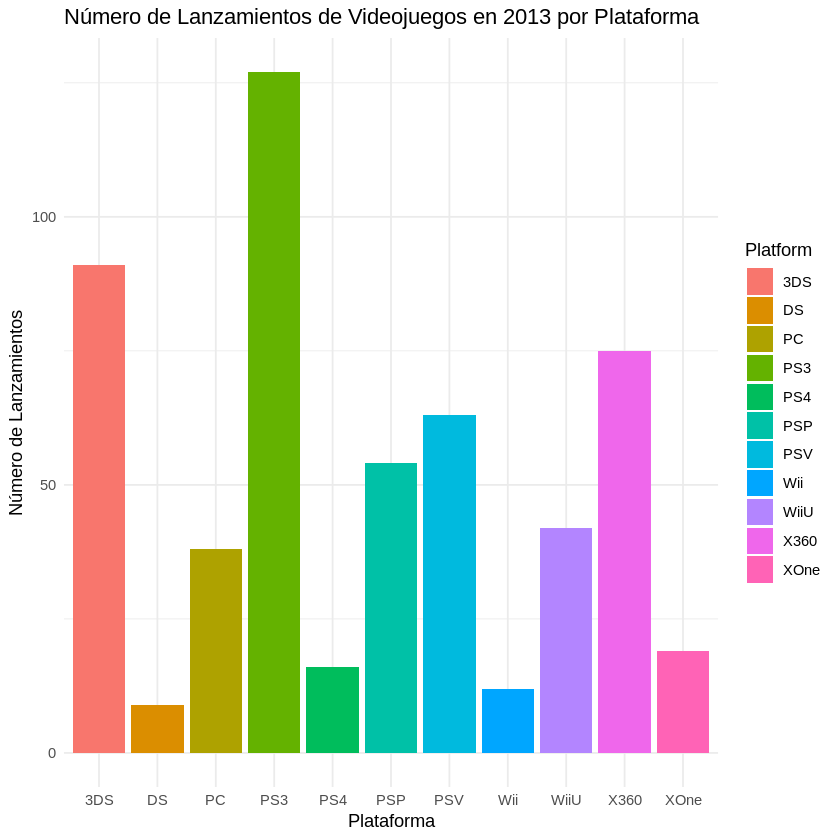

In [ ]:
#2013
lanzamientos_2013 <- Videojuegos %>% filter(Year == 2013)
lanzamientos_por_plataforma <- lanzamientos_2013 %>%
group_by(Platform) %>%
summarise(NumeroLanzamientos = n())
print(lanzamientos_por_plataforma)
ggplot(lanzamientos_por_plataforma, aes(x = Platform, y = NumeroLanzamientos, fill = Platform)) +
  geom_bar(stat = "identity") +
  theme_minimal() +
  labs(title = "Número de Lanzamientos de Videojuegos en 2013 por Plataforma",
       x = "Plataforma", y = "Número de Lanzamientos")

###Tendencia de ventas globales
Por último realizaremos unos gráficos para poder ver las tendencias de las diferentes consolas y poder comparar los datos de manera sencilla. Aunque de primeras podemos ver que según los años hay plataformas que van desapareciendo y otras nuevas aparecen.


# A tibble: 39 × 2
   Year  VentasTotales
   <chr>         <dbl>
 1 1980           11.4
 2 1981           35.8
 3 1982           28.9
 4 1983           16.8
 5 1984           50.4
 6 1985           53.9
 7 1986           37.1
 8 1987           21.7
 9 1988           47.2
10 1989           73.4
# ℹ 29 more rows


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


# A tibble: 241 × 3
# Groups:   Year [39]
   Year  Platform VentasTotales
   <chr> <chr>            <dbl>
 1 1980  2600             11.4 
 2 1981  2600             35.8 
 3 1982  2600             28.9 
 4 1983  2600              5.83
 5 1983  NES              11.0 
 6 1984  2600              0.27
 7 1984  NES              50.1 
 8 1985  2600              0.45
 9 1985  DS                0.02
10 1985  NES              53.4 
# ℹ 231 more rows


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


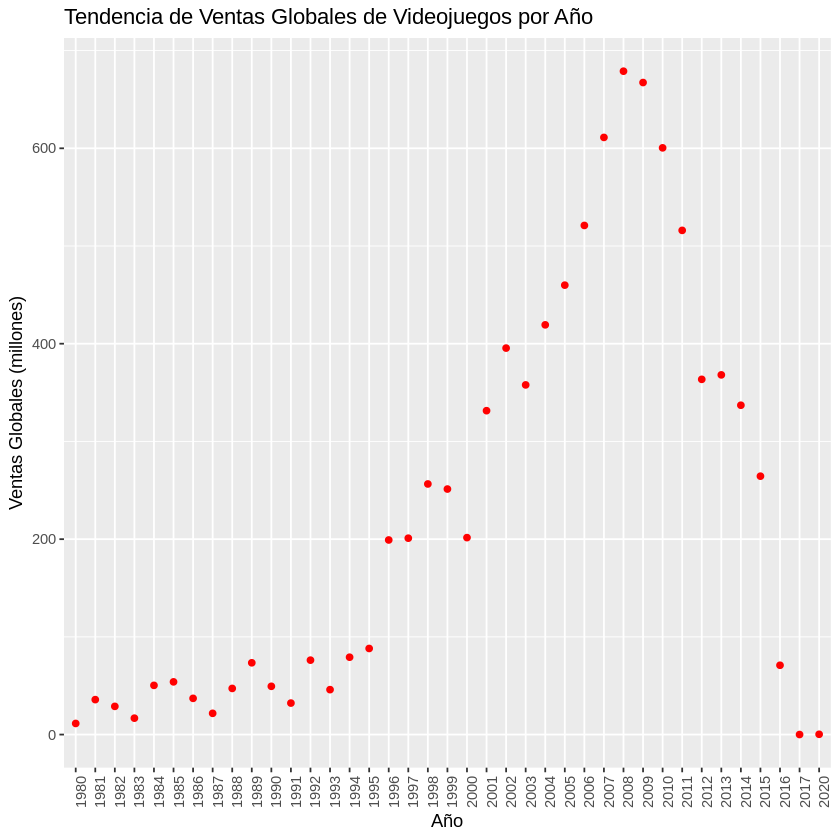

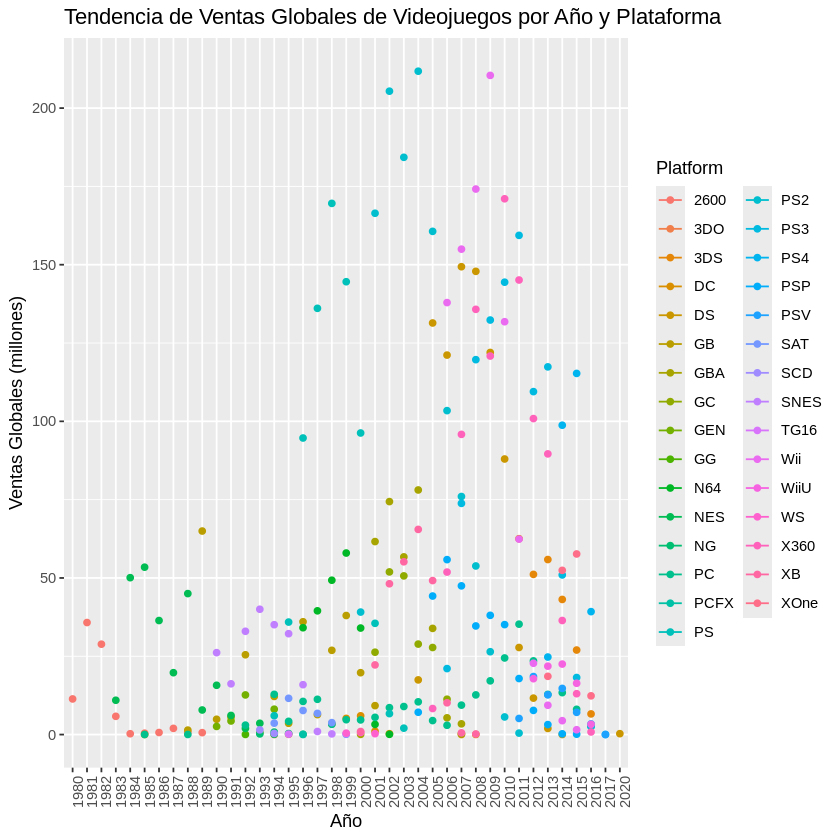

In [ ]:
ventas_por_año <- Videojuegos %>%
  group_by(Year) %>%
  summarise(VentasTotales = sum(Global_Sales, na.rm = TRUE))
  print(ventas_por_año)

ggplot(ventas_por_año, aes(x = Year, y = VentasTotales)) +
  geom_line(color = "blue") +
  geom_point(color = "red") +
  labs(title = "Tendencia de Ventas Globales de Videojuegos por Año",
       x = "Año", y = "Ventas Globales (millones)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))

ventas_por_año_plataforma <- Videojuegos %>%
  group_by(Year, Platform) %>%
  summarise(VentasTotales = sum(Global_Sales, na.rm = TRUE))

print(ventas_por_año_plataforma)

ggplot(ventas_por_año_plataforma, aes(x = Year, y = VentasTotales, color = Platform)) +
  geom_line() +
  geom_point() +
  labs(title = "Tendencia de Ventas Globales de Videojuegos por Año y Plataforma",
       x = "Año", y = "Ventas Globales (millones)") +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
